In [1]:
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utilibs as ul

In [2]:
timepoints = pd.read_csv(r"D:\PPMI_UA_2021\Database\timepoints.csv")
source = r"D:\PPMI_UA_2021\Flight Data"

In [3]:
# Computed flight path angle
storage = {}
disp = [i*250 for i in range(15)]
for ifile, file in enumerate(timepoints.fname.tolist()):
    if ifile in disp:
        print(f"{ifile:4.0f}  ... {file} ...")
    idx1 = int(timepoints.tp114.iloc[ifile])
    idx2 = int(timepoints.tp115.iloc[ifile])
    df = pd.read_csv(source + os.path.sep + file +str(".zip"),compression='zip')
    hdot_1_mps =  ul.interpnan(df["hdot_1_mps"][idx1-20:idx2+20])
    gs_mps = ul.interpnan(df["gs_mps"][idx1-20:idx2+20])
    hdot_1_mps = hdot_1_mps.loc[idx1:idx2].to_numpy()
    gs_mps = gs_mps.loc[idx1:idx2].to_numpy()
    gamma_rad = np.arcsin(hdot_1_mps/gs_mps)
    storage[file] = gamma_rad
storage = pd.DataFrame(storage)
storage.to_csv(r"D:\PPMI_UA_2021\Database\gamma_computed.csv", index=False)

   0  ... flight_10054 ...
 250  ... flight_13822 ...
 500  ... flight_17667 ...
 750  ... flight_20737 ...
1000  ... flight_24048 ...
1250  ... flight_29115 ...
1500  ... flight_32197 ...
1750  ... flight_35271 ...
2000  ... flight_39205 ...
2250  ... flight_42954 ...
2500  ... flight_46924 ...
2750  ... flight_50266 ...
3000  ... flight_54148 ...
3250  ... flight_57404 ...
3500  ... flight_61816 ...


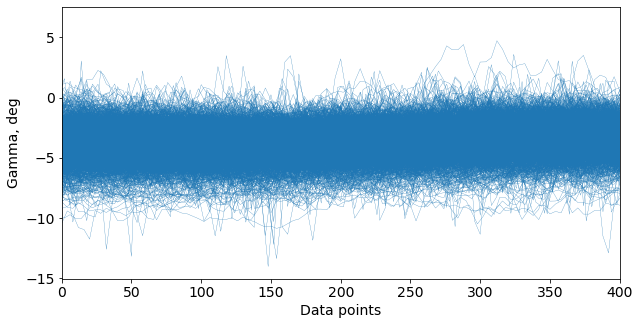

In [2]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\gamma_computed.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy() * math.degrees(1), '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("Gamma, deg", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\gamma_computed.png")

### Unstable Approach Criteria in terms of Flight Path Angle

In [2]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\gamma_computed.csv")
counter, sampling, duration = 0, 16, 5
up_bound = -1.0
lw_bound = -5.0
gamma_flag = []
for ifile, file in enumerate(df.columns.tolist()):
    gamma_deg = df[file].to_numpy() * math.degrees(1)
    for irow, _ in enumerate(gamma_deg):
        if irow >= gamma_deg.shape[0] - sampling * duration:
            gamma_flag.append(0)
            break
        else:
            flag_up = gamma_deg[irow:irow + sampling * duration] >= up_bound
            flag_lw = gamma_deg[irow:irow + sampling * duration] <= lw_bound
            if sum(flag_up) >= sampling * duration or sum(flag_lw) >= sampling * duration:
                gamma_flag.append(1)
                print(f"{ifile:4.0f} ... {file} ... Unstable")
                counter += 1
                break
sop_criteria = pd.read_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv")
sop_criteria["gamma"] = gamma_flag
sop_criteria.to_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv", index=False)

   1 ... flight_10060 ... Unstable
   8 ... flight_10164 ... Unstable
  15 ... flight_10331 ... Unstable
  35 ... flight_10499 ... Unstable
  53 ... flight_10806 ... Unstable
  75 ... flight_11048 ... Unstable
  79 ... flight_11088 ... Unstable
  97 ... flight_11397 ... Unstable
 103 ... flight_11425 ... Unstable
 106 ... flight_11449 ... Unstable
 130 ... flight_11705 ... Unstable
 131 ... flight_11707 ... Unstable
 141 ... flight_11855 ... Unstable
 159 ... flight_12240 ... Unstable
 174 ... flight_12526 ... Unstable
 175 ... flight_12528 ... Unstable
 177 ... flight_12532 ... Unstable
 206 ... flight_13060 ... Unstable
 230 ... flight_13550 ... Unstable
 231 ... flight_13552 ... Unstable
 236 ... flight_13659 ... Unstable
 246 ... flight_13800 ... Unstable
 252 ... flight_13834 ... Unstable
 265 ... flight_14083 ... Unstable
 291 ... flight_14523 ... Unstable
 306 ... flight_14677 ... Unstable
 352 ... flight_15357 ... Unstable
 367 ... flight_15532 ... Unstable
 387 ... flight_1573

In [3]:
counter

249